In [21]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [22]:
os.listdir()

['optimiation3.pdf',
 'README.md',
 'optimiation2.pdf',
 'optimiation.pdf',
 'Papers',
 'bayesopt2.py',
 '__pycache__',
 'optimiation1.pdf',
 'UpdateConfirmation.ipynb',
 'bayesopt.py',
 'GPUpdating.ipynb',
 '.vscode',
 'locs.pkl',
 '.git',
 'AcquiringExample.ipynb',
 'StochasticProcesses',
 'vals.pkl',
 '.gitignore',
 '.ipynb_checkpoints']

In [23]:
with open("locs.pkl", "rb") as f:
    locs = pickle.load(f)
with open("vals.pkl", "rb") as f:
    vals = pickle.load(f)

In [24]:
def squared_exponential_kernel(x1, x2, length_scale=1.0, stdev=1.0):
    sq_distance = (x1[:, None] - x2[None, :]) ** 2
    return stdev**2 * np.exp(-0.5 * sq_distance/(length_scale ** 2))

kernel = lambda x1, x2: squared_exponential_kernel(x1, x2, length_scale=0.5)

In [25]:
X_domain = np.linspace(0, 5, 201)
mu_domain = np.zeros_like(X_domain)

X_obs = np.array(locs)
y = np.array(vals)
mu_obs = np.zeros_like(locs)

Sigma_ff = kernel(X_domain, X_domain)
Sigma_yy = kernel(X_obs, X_obs)

Sigma_fy_T = kernel(X_domain, X_obs)

In [26]:
posterior_mean = mu_domain + Sigma_fy_T @ np.linalg.inv(Sigma_yy) @ (y - mu_obs)

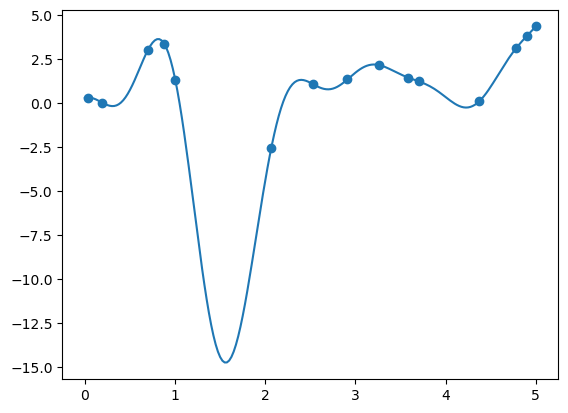

In [27]:
plt.plot(X_domain, posterior_mean)
plt.scatter(locs, vals)
plt.show()